Candidate: Kumutha S.Ramachanidran
#
Date: 10/01/2023
#
Assessment: 2
#
1) Develop your own model using LSTM which can achieve accuracy of more
than 70% and F1 score of more than 0.7.
2) You are only allowed to use TensorFlow library to develop and train the
model.
3) Plot the graph using Tensorboard.
4) Save the model in .h5 format in a folder named saved_models.
5) Save tokenizer in .json format in a folder named saved_models


Git: https://github.com/rkumutha/Assessment_2_NLP


In [583]:
#importing important libraries and modules
#how to use regex 
import re 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#model development 
from keras.models import Sequential
import datetime,os, pickle
#one hot encoder 
from sklearn.preprocessing import OneHotEncoder
#tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_Sequences
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Dropout
#from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from sklearn.preprocessing import MultiLabelBinarizer


In [562]:
#step 1: data loading 
URL = 'https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv'
df = pd.read_csv(URL)



In [411]:
#step 2: data inspection
df.describe() 

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [239]:
#step 2: data inspection to obtain the data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [240]:
#step 2: data inspection to display the first 5 rows in the .csv file
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [223]:
#checking for duplication data -> 99 dupliaction were noticed 
df.duplicated().sum()

99

In [563]:
#remove duplications data
df = df.drop_duplicates()

In [518]:
#checking for duplication once drop -> no duplication data now
df.duplicated().sum()

0

In [390]:
df.isna().sum() #to check the number os NaNs

category    0
text        0
dtype: int64

In [294]:
#display the text data 
print(df['text'][5])

howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an  attack mongrel  shows labour is  rattled  by the opposition.  in an upbeat speech to his party s spring conference in brighton  he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate.  something tells me that someone  somewhere out there is just a little bit rattled   mr howard said. mr hain  leader of the commons  told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an  attack mongrel  and  playing opposition for opposition sake .  mr howard told his party that labour would  do anything  say anything  claim anything to cling on to office at all costs .  so far this year they have compared me to fagin  to shylock and to a flying pig. this morn

In [564]:
#data cleaning 
import re
for index, data in enumerate(df['text']):
    #df['text'][index] = re.sub('\<.*?\>','',data)
    df['text'][index] = re.sub('\(.*?\)','',data) #remove brackets 
    #df['text'][index] = re.sub('[^a-zA-Z]',' ',df['text'][index]).lower()
    df['text'][index] = re.sub('[^a-zA-Z]',' ',data) #remove no, symbols 

In [341]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time   that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes  with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices   one of the most talked about technologies of ces has been digital and personal video recorders  dvr and pvr   these set top boxes  like the us s tivo and the uk s sky  system  allow people to record  store  play  pause and forward wind tv programmes when they want   essentially  the technology allows for much more personalised tv  they are also being built in to high

In [565]:
#step 4: features selection
text = df['text']
category = df['category']

In [566]:
#step 5 data preprocessing 
num_words = 5000
oov_token = '<OOV>' #out of vocabulary 

In [567]:
#step 5: apply tokenizer 
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token )

In [568]:
#to train the tokenizer --> mms.fir()
tokenizer.fit_on_texts(text)
word_index = tokenizer.word_index
print(dict(list(word_index.items())[0:10])) #

{'<OOV>': 1, 'the': 2, 'to': 3, 'of': 4, 'and': 5, 'a': 6, 'in': 7, 's': 8, 'for': 9, 'is': 10}


In [569]:
#to transform the text using tokenizer --> mms.transform 
text = tokenizer.texts_to_sequences(text)

In [570]:
#step 5 : apply padding
#padding 
#from tensorflow.
padded_text = pad_sequences(text,maxlen=200, padding='post', truncating='post')

In [571]:
#using one hot encoder to transform the category variable

# ohe = OneHotEncoder(sparse=False)
# subject = ohe.fit_transform(category[::,None])

ohe = MultiLabelBinarizer()
subject = ohe.fit_transform(category[::,None])
# print(ohe.classes)

# convert to numpyarray
subject = np.array(subject)



C:\Users\User\AppData\Local\Temp\ipykernel_6044\2631011099.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  subject = ohe.fit_transform(category[::,None])


In [572]:
#expand dimension before splitting the datasets into train and test
#padded_text = np.expand_dims(padded_text, axis=1)

X_train, X_test, y_train, y_test = train_test_split(padded_text,np.array(subject),test_size=0.3, random_state=123)

In [573]:
#step 7: model development 
embedding_layer = 128

model = Sequential() 
model.add(Embedding(num_words, embedding_layer))
model.add(LSTM(embedding_layer, return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(64))
#model.add(Dropout(0.3))
model.add(Dense(5,activation='softmax')) #softmax is used for multiclass label 
model.summary() 

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 128)         640000    
                                                                 
 lstm_63 (LSTM)              (None, None, 128)         131584    
                                                                 
 lstm_64 (LSTM)              (None, 64)                49408     
                                                                 
 dense_24 (Dense)            (None, 5)                 325       
                                                                 
Total params: 821,317
Trainable params: 821,317
Non-trainable params: 0
_________________________________________________________________


In [574]:
#model compile
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

In [575]:
#callbacks 
#create the tensorboard callback

log_path = os.path.join('log_dir', 'tl_demo', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tb = callbacks.TensorBoard(log_dir=log_path)

In [576]:
#step 8: train data
hist = model.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=64,epochs=5,callbacks=[tb])

#hist = model.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=32,epochs=5)


Epoch 1/5
24/24 [==============================] - 34s 1s/step - loss: 1.6021 - acc: 0.2386 - val_loss: 1.6002 - val_acc: 0.2539
Epoch 2/5
24/24 [==============================] - 35s 1s/step - loss: 1.5792 - acc: 0.2688 - val_loss: 1.6201 - val_acc: 0.2194
Epoch 3/5
24/24 [==============================] - 39s 2s/step - loss: 1.4122 - acc: 0.3918 - val_loss: 1.7533 - val_acc: 0.2524
Epoch 4/5
24/24 [==============================] - 39s 2s/step - loss: 1.0631 - acc: 0.5948 - val_loss: 2.0899 - val_acc: 0.1991
Epoch 5/5
24/24 [==============================] - 40s 2s/step - loss: 0.7008 - acc: 0.7487 - val_loss: 2.4201 - val_acc: 0.2257


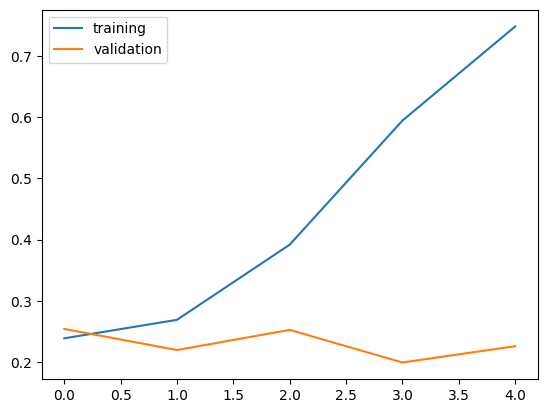

In [577]:
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['training','validation'])
plt.show()

In [578]:
y_predicted = model.predict(X_test)
y_pred = np.argmax(y_predicted,axis=1)
y_test = np.argmax(y_test,axis=1)

20/20 [==============================] - 3s 112ms/step


In [579]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.29      0.30       158
           1       0.22      0.28      0.24       100
           2       0.18      0.24      0.21       123
           3       0.21      0.17      0.19       141
           4       0.22      0.14      0.17       116

    accuracy                           0.23       638
   macro avg       0.22      0.22      0.22       638
weighted avg       0.23      0.23      0.22       638



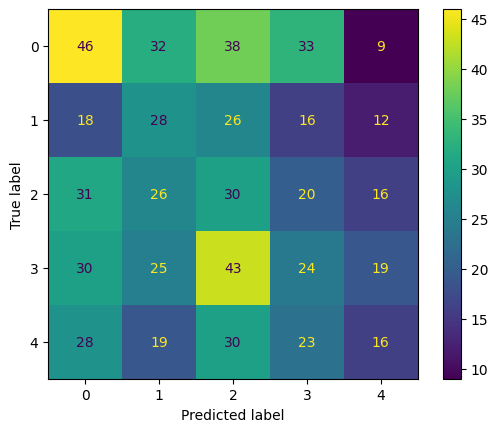

In [580]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [581]:
model.save('model.h5')

In [584]:
#to save one hot encoder model 
with open('ohe.pkl','wb') as f:
    pickle.dump(ohe,f)

In [585]:
#to save tokenizer
import json
token_json = tokenizer.to_json()
with open('tokenizer.json','w') as f:
    json.dump(token_json,f)